In [41]:
import pandas as pd
df = pd.read_csv('names_1887-2023.csv')

In [42]:
# cast rank to int
df["Rank"] = df["Rank"].astype(int)
df["maleRatio"] = df['PctOfMaleBirths'].apply(lambda x: x.replace('%', '')).astype(float)/100
df["femaleRatio"] = df['PctOfFemaleBirths'].apply(lambda x: x.replace('%', '')).astype(float)/100

In [43]:

def create_most_popular_names_plot(top_x=20):
        
    byYear = df.query("Rank <=@top_x").groupby("Year")
    # aggreate the sum of maleRatio for each group
    byYear = byYear.agg({"maleRatio": "sum", "femaleRatio": "sum"})
    byYear.plot(title=f'{top_x} most popular names by percentage of total births')

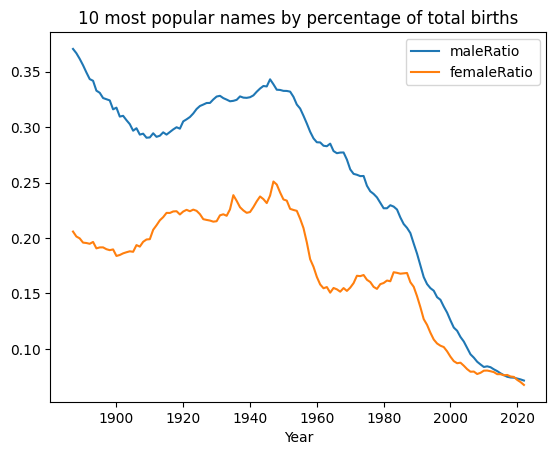

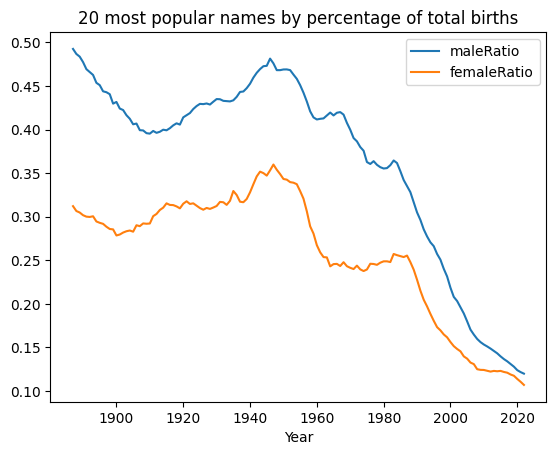

In [44]:
create_most_popular_names_plot(10)
create_most_popular_names_plot(20)

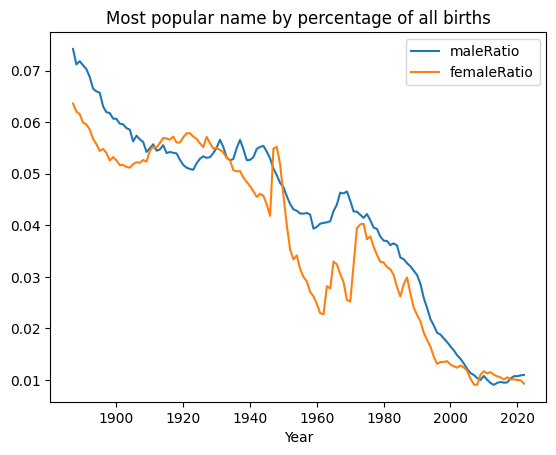

In [45]:
def most_popular_name_by_percentage_of_all():
    top_names = df.query("Rank == 1")
    top_names.plot(x="Year", y=["maleRatio", "femaleRatio"], title="Most popular name by percentage of all births")
    
most_popular_name_by_percentage_of_all()

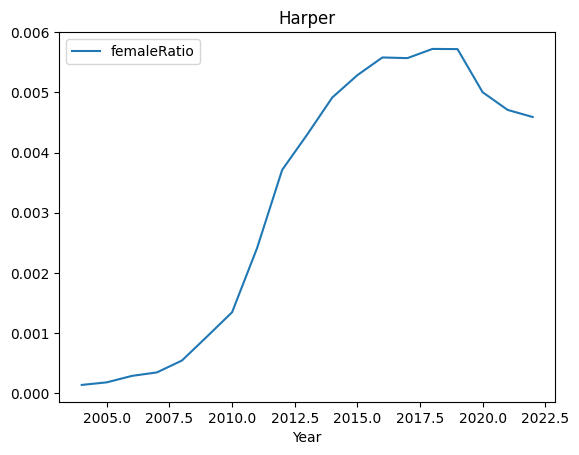

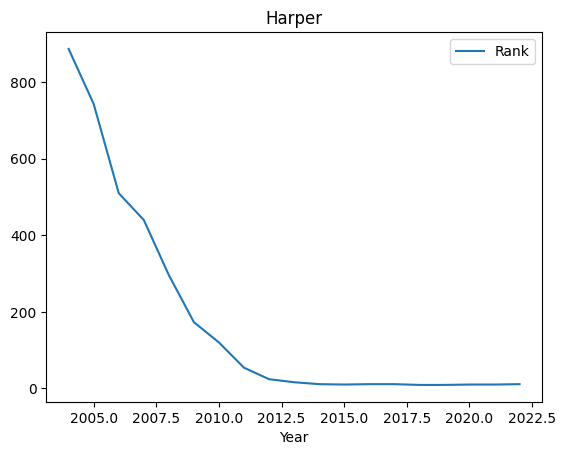

In [46]:
def popularity_of_female_name_over_time(name:str):
    
    iris = df[df['Female name']==name]
    iris.plot(x="Year", y=["femaleRatio"], title=name)
    iris.plot(x="Year",y=["Rank"], title=name)
    
popularity_of_female_name_over_time("Harper")

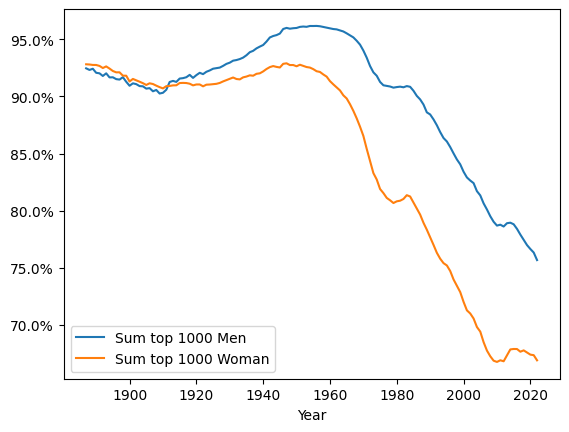

In [47]:
byYear1000 = df.groupby("Year").agg({"maleRatio": "sum", "femaleRatio": "sum"})
# make the y axis percentage
import matplotlib.ticker as mtick
ax = byYear1000.plot()
ax.legend(["Sum top 1000 Men",'Sum top 1000 Woman'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

,maleRatio,femaleRatio
Year,,
1980,0.226848,0.159431


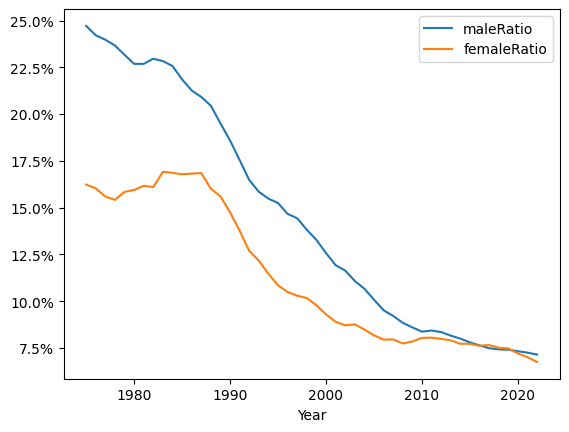

In [59]:
def top10_by_share_by_year():
    top10 = df.query("Rank <= 10 & Year>= 1975")
    
    byYear = top10.groupby("Year").agg({"maleRatio": "sum", "femaleRatio": "sum"})
    ax = byYear.plot()
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

top10_by_share_by_year()

top102022 = df.query("Rank <= 10 & Year==2022").groupby("Year").agg({"maleRatio": "sum", "femaleRatio": "sum"})
top102022

top101980 = df.query("Rank <= 10 & Year==1980").groupby("Year").agg({"maleRatio": "sum", "femaleRatio": "sum"})
top101980

In [57]:
def most_popular_name_by_year(ranking:int, year:int):
            
    # Convert the 'femaleRatio' column to a numeric datatype
    df['femaleRatio'] = pd.to_numeric(df['femaleRatio'], errors='coerce')
    
    # Initialize an empty plot
    ax = pd.DataFrame().plot()
    ax.set_title(f"Most popular name by percentage of all births in {year}")
    
    # Get data for each rank and plot it
    for rank in range(1, ranking + 1):
        names = df.query("Rank == @rank & Year >= @year")
        names.plot(x="Year", y="femaleRatio", ax=ax, label=f"Rank {rank}")
    
    # Customize the legend by specifying the labels for your data points
    ax.legend(title="Rank", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
most_popular_name_by_year(10,1975)